In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data1=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/Project/winemag-data_first150k_wvarietals.csv')

data2=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/Project/winemag-data-130k-v2_wvarietals.csv')



Below section is for combining the two large datasets and pre-processing them for exploratory data insights

In [2]:
data3= data2.drop('taster_name', axis=1)
data4= data3.drop('taster_twitter_handle',axis=1)
data5= data4.drop('title',axis=1)
data=pd.concat([data1,data5])
data=data.drop('Unnamed: 0',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 11 columns):
country        280833 non-null object
description    280901 non-null object
designation    197701 non-null object
points         280901 non-null int64
price          258210 non-null float64
province       280833 non-null object
region_1       234594 non-null object
region_2       111464 non-null object
variety        280900 non-null object
winery         280901 non-null object
Color          280839 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 25.7+ MB


In [3]:
#Since region_2 had a lot of null values as seen from above statistics, removed that fromthe dataset
data=data.drop('region_2',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 129970
Data columns (total 10 columns):
country        280833 non-null object
description    280901 non-null object
designation    197701 non-null object
points         280901 non-null int64
price          258210 non-null float64
province       280833 non-null object
region_1       234594 non-null object
variety        280900 non-null object
winery         280901 non-null object
Color          280839 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 23.6+ MB


In [4]:
#adding a point classification column
Class = []
for col in data['points']:
    if col<=85:
        Class.append("poor")
    elif col >85 and col<=90:
        Class.append("normal")
    elif col >90 and col<=95:
        Class.append("good")
    else:
        Class.append("excellent") 


        
    

In [5]:
data['Class']=Class
#Removing all Null values from all columns
data10= data.dropna()
#Removing the duplicates from description column
#First sorting the descriptions
data10.sort_values("description", inplace=True)
#Drop duplicates according to descriptions
data10.drop_duplicates(subset="description",keep='first', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
data10.to_csv("data10.csv", index=False)
data=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/data10.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89580 entries, 0 to 89579
Data columns (total 11 columns):
country        89580 non-null object
description    89580 non-null object
designation    89580 non-null object
points         89580 non-null int64
price          89580 non-null float64
province       89580 non-null object
region_1       89580 non-null object
variety        89580 non-null object
winery         89580 non-null object
Color          89580 non-null object
Class          89580 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 7.5+ MB


In [7]:
data10.to_csv("data10.csv", index=False)
data=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/data10.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89580 entries, 0 to 89579
Data columns (total 11 columns):
country        89580 non-null object
description    89580 non-null object
designation    89580 non-null object
points         89580 non-null int64
price          89580 non-null float64
province       89580 non-null object
region_1       89580 non-null object
variety        89580 non-null object
winery         89580 non-null object
Color          89580 non-null object
Class          89580 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 7.5+ MB


Creating the bag of words and processing the descriptions in the dataset

In [8]:
#Creating the method to return meaningful words
#this method will be used throughout the program during data analytics and preprocessing the training and testing models
import re
import nltk as nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup  

def convertToWords(raw_overview):
    removeFloat = re.sub("'.*([0-9]\.[0-9]+)'",           # The pattern to search for
                      "' '",                   # The pattern to replace it with
                     raw_overview)
    
    tempData = BeautifulSoup(removeFloat).get_text()
    
    letter_only = re.sub("[^a-zA-Z]", " ", tempData) 
    
    words = letter_only.lower().split()  
    
    stops = set(stopwords.words("english"))   
    
    meaningful_words = [w for w in words if not w in stops]  
    
    return( " ".join( meaningful_words ))

In [10]:
clean_overview =[]
for i in range (0,89579):
 clean_overview.append(convertToWords(str(data["description"][i])))

print (clean_overview[100])

varietal wine aged entirely new french oak big bodied grippy wine slightly syrupy ripe red fruit complexity dried herb cedar makes fine representative relatively cooler appellation comes


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
print("Start")
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
print("mid")
train_data_features = vectorizer.fit_transform(clean_overview)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
print("done")
train_data_features.shape

Start
mid
done


(89579, 27879)

In [12]:
vocab = vectorizer.get_feature_names()
print (vocab)

['aa', 'aalto', 'aaron', 'ab', 'abacela', 'abad', 'abadal', 'abadia', 'abandon', 'abandoned', 'abandoning', 'abarbanel', 'abate', 'abbaye', 'abbey', 'abbinare', 'abbott', 'abbreviated', 'abbruzzo', 'abbuoto', 'abc', 'abeilles', 'abeja', 'abel', 'abele', 'abelis', 'abernathy', 'aberrant', 'abetina', 'abeyance', 'abide', 'abiding', 'abilities', 'ability', 'abiouness', 'able', 'ably', 'abnormal', 'abnormally', 'aboard', 'abondante', 'abord', 'aboriginal', 'abound', 'abounding', 'abounds', 'abouriou', 'abracadabra', 'abrasive', 'abrasiveness', 'abreu', 'abrigo', 'abroad', 'abrupt', 'abruptly', 'abruzzi', 'abruzzo', 'absence', 'absent', 'absinthe', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absurdly', 'abundance', 'abundant', 'abundantly', 'abused', 'abut', 'abuts', 'abuzz', 'abv', 'abyss', 'ac', 'acacia', 'academic', 'acai', 'acate', 'acccessible', 'accelerate', 'accelerates', 'accent', 'accented', 'accenting', 'accents', 'accentuate', 'accentuated', 'accentua

In [13]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

1 aa
1 aalto
13 aaron
1 ab
8 abacela
1 abad
4 abadal
1 abadia
4 abandon
3 abandoned
1 abandoning
1 abarbanel
3 abate
2 abbaye
14 abbey
1 abbinare
4 abbott
21 abbreviated
1 abbruzzo
1 abbuoto
1 abc
1 abeilles
4 abeja
3 abel
1 abele
2 abelis
1 abernathy
1 aberrant
4 abetina
1 abeyance
1 abide
1 abiding
3 abilities
100 ability
1 abiouness
65 able
11 ably
3 abnormal
2 abnormally
1 aboard
2 abondante
1 abord
1 aboriginal
155 abound
1 abounding
24 abounds
9 abouriou
1 abracadabra
98 abrasive
3 abrasiveness
2 abreu
2 abrigo
3 abroad
69 abrupt
30 abruptly
1 abruzzi
44 abruzzo
25 absence
5 absent
1 absinthe
44 absolute
238 absolutely
21 absorb
11 absorbed
2 absorbing
1 absorbs
1 absurdly
113 abundance
218 abundant
15 abundantly
2 abused
1 abut
1 abuts
1 abuzz
56 abv
3 abyss
3 ac
274 acacia
2 academic
6 acai
2 acate
1 acccessible
1 accelerate
1 accelerates
632 accent
1195 accented
103 accenting
1252 accents
42 accentuate
40 accentuated
76 accentuates
14 accentuating
1 accept
1 acceptability
63 a

1 ammo
16 ammonia
1 ammonites
1 ammons
1 amok
373 among
1 amongae
13 amongst
21 amontillado
1 amontillados
4 amore
9 amorphous
4 amouller
421 amount
301 amounts
7 amour
2 amoureuses
1 amp
29 amped
1 ampelographers
1 amphibolite
6 amphitheater
1 amphitheatre
7 amphora
16 amphorae
1 amphoras
784 ample
1 ampleness
38 amplified
14 amplifies
6 amplify
1 amplifying
5 amplitude
1 amplus
46 amply
5 amps
3 ampuis
3 amusing
1 amusingly
4 amy
1 ana
2 anagram
1 anakota
1 analog
1 analogies
1 analogy
10 analysis
1 analytical
4 analyze
1 analyzed
2 analyzing
6 anam
1 anas
1 anathema
1 anc
4 ancellotta
1 ancenis
4 ancestor
5 ancestors
1 ancestral
1 ancestrale
2 ancestry
5 ancho
23 anchor
62 anchored
8 anchoring
33 anchors
2 anchovies
1 anchovy
1 ancien
1 ancienne
59 ancient
1 ancilla
2 ancillary
1 ancona
1 andalmond
1 andalucian
2 andalusia
1 andcherry
1 andd
2 andelain
5 andeluna
77 anderson
2 andes
1 andflat
4 andis
1 andlau
1 andpeppery
1 andpineapple
5 andr
3 andrea
3 andreas
3 andres
1 andretta


182 beeswax
114 beet
23 beetroot
42 beets
1 befit
36 befits
2 befitting
2 beforehand
10 beg
3 begali
19 began
1 begets
17 begging
186 begin
1 begining
2 beginner
239 beginning
12 beginnings
200 begins
54 begs
1 beguile
10 beguiles
104 beguiling
1 beguilingly
25 begun
1 behalf
3 behave
17 behaved
3 behaves
4 behemoth
417 behind
3 behold
5 beko
2 bel
1 belasco
3 belcanto
3 belcier
3 belcore
1 belgian
2 belguardo
2 belhurst
15 belie
1 belied
3 belief
46 belies
47 believe
8 believed
1 believer
9 believes
1 believing
1 belingard
284 bell
27 bella
3 belland
1 bellangelo
2 bellavista
12 belle
1 bellefon
2 bellenda
7 belleville
3 bellezza
3 bellinis
1 bellisimo
2 bellissima
11 bello
1 bellone
1 bellos
1 bellowing
19 bells
1 bellugues
5 bellussi
1 bellwether
5 belly
1 belmont
1 belnd
3 belnero
1 belo
5 belong
4 belonged
4 belonging
23 belongs
18 beloved
12 belt
1 belted
1 belvedere
1 belying
1 belzbrunnen
2 bembibre
1 bemoan
17 ben
4 benanti
1 benavides
29 bench
1 benched
9 benches
3 benchland


1 bourguignons
3 bourne
1 bourseau
5 bouscass
58 bouschet
1 boushet
79 boushey
1 bousquet
1 boutenac
23 boutique
4 boutiques
1 bouts
2 bouvet
1 bouyancy
1 bouyant
1 bouyssou
3 bouzy
19 bovale
1 bovaleddu
5 bow
3 bower
1 bowie
2 bowing
4 bowker
62 bowl
1 bowled
1 bowling
3 bowls
1 bowman
1 bowral
1 bows
301 box
8 boxed
3 boxes
5 boxwood
26 boy
1 boyish
1 boyle
5 boys
55 boysenberries
839 boysenberry
312 br
1 bra
1 braai
2 braccale
2 bracchetto
5 brace
44 braced
1 braceros
4 braces
6 brachetto
602 bracing
14 bracingly
2 bracken
1 bracketed
2 bracketing
1 brackish
2 brad
4 bradford
5 bradley
1 braeburn
1 braid
1 braide
11 brain
5 brainer
2 brains
1 brainy
1 braise
53 braised
9 braises
1 brakes
1 bramaluce
1 bramante
1 bramare
365 bramble
1 brambleberries
5 brambleberry
3 brambles
1 brambley
548 brambly
1 bramby
4 bramley
2 branca
1 brancaia
5 branch
2 branched
1 branchy
164 brand
3 brandborg
15 branded
18 brander
67 brandied
4 branding
1 brandon
46 brands
42 brandy
37 brash
1 brashly
1 br

19 cask
97 casks
1 casorzo
1 cass
1 cassango
2 casseroles
2 cassiopeia
3716 cassis
1 cassone
12 cassoulet
25 cast
1 castagneto
1 castaldi
3 castel
1 castelgiocondo
1 castelgreve
1 castell
2 castellani
3 castellero
2 castelletto
1 castelli
1 castellina
25 castello
1 castelluccio
1 castelnau
1 castelnuovo
1 castera
1 castiglion
5 castiglione
1 castilian
1 castillian
4 castillon
2 casting
33 castle
1 castles
1 castor
3 castoro
2 casts
66 casual
1 casually
3 casualty
1 casuccia
29 cat
8 catalan
2 catalanesca
4 catalina
2 catalog
1 cataloged
13 catalonia
22 catalonian
1 catalunyan
1 catamarca
3 catapult
1 catapulted
1 catapults
1 cataracts
2 cataratto
1 catarrato
64 catarratto
1 catarrotto
4 catawba
34 catch
1 catcher
8 catches
1 catchiest
5 catching
9 catchy
1 categeory
2 categories
1 categorize
1 categorized
120 category
11 catena
4 caterina
1 caters
5 cates
2 cathedral
3 catherine
1 catholic
2 cathy
1 catnip
1 cats
1 cattaneo
3 cattier
1 cattin
1 cattle
1 cattleman
1 cattura
6 catty
2 ca

1 circuit
1 circuits
1 circulating
1 circulation
4 circumstances
3 circus
1 cirino
1 ciro
2 cirque
2 cirsion
1 cisp
2 cissac
1 cistrus
3 citadel
3 citation
1 cited
348 citric
1 citrine
20 citron
1 citronella
3 citrons
7070 citrus
2 citruslike
2 citrussy
868 citrusy
1 citto
40 city
9 civ
1 civil
4 civilized
3 cl
1 claar
6 clack
38 clacky
2 clad
3 clafouti
2 clafoutis
2 claiborne
19 claim
3 claimed
1 claiming
11 claims
42 clairette
8 clam
2 clammy
23 clamp
6 clamped
15 clamping
5 clamps
71 clampy
16 clams
1 clamshell
1 clancy
1 clandestino
3 clangy
1 clanky
1 clans
3 clape
1 clapton
8 clara
36 clare
20 clarendon
43 claret
1 clarete
1 claretized
2 clarets
13 clarified
1 clarifying
1 clarine
6 clarion
4 clarissa
2 clarita
124 clarity
6 clarke
17 clarksburg
1 clart
12 clash
1 clashes
1 clashing
1 clasping
246 class
9 classed
1423 classic
1 classica
27 classical
151 classically
2 classicism
2 classicists
1 classicly
201 classico
2 classicos
4 classics
1 classiest
1 classification
15 classifi

1 conforms
1 confound
6 confounding
5 confounds
1 confr
2 confront
1 confrontational
1 confronted
9 confuse
19 confused
1 confuses
16 confusing
5 confusingly
3 confusion
1 conga
2 congenial
1 conglomeration
1 congratulated
2 congratulations
2 congruent
3 coniale
9 conifer
2 conjoin
3 conjoined
3 conjunction
22 conjure
1 conjurer
17 conjures
6 conjuring
8 conn
1 connais
2 connect
6 connected
1 connecticut
16 connection
2 connections
1 connects
1 connell
28 conner
9 connoisseur
11 connoisseurs
1 connotes
2 conquer
3 conquers
2 conquest
1 conscientious
2 conscious
1 consciousness
3 consecutive
1 consensio
1 consensus
4 consequence
2 consequent
9 consequently
5 conservancy
3 conservation
12 conservative
3 conservatively
40 consider
328 considerable
88 considerably
1 considerate
4 consideration
58 considered
75 considering
4 considers
1 consigned
1 consisent
1 consisently
4 consist
165 consistency
229 consistent
113 consistently
18 consisting
36 consists
1 consitutes
1 consolidate
2 consoli

88 dances
1 dancin
57 dancing
3 dancingly
7 dandelion
2 dandelions
8 dandy
5 danger
3 dangerous
11 dangerously
1 dangers
8 daniel
2 danieli
1 danielle
21 daniels
7 danish
20 dank
1 danker
1 dankness
1 danseur
2 dante
2 danzer
9 daou
2 daphne
27 dappled
1 dapples
2 dappling
1 dar
2 darby
2 darcie
1 dardi
3 dardis
13 dare
1 daren
1 darien
3 daring
2 daringly
1 darjeeling
8457 dark
10 darken
10 darkened
5 darkening
7 darkens
282 darker
19 darkest
2 darkish
96 darkly
72 darkness
3 darling
1 darlings
3 darms
16 darn
1 darnaud
4 darned
1 darren
1 darroze
1 dart
3 dartier
3 darting
1 darts
2 daryl
221 dash
3 dashe
1 dashed
17 dashes
1 dashing
4 dassault
1 database
167 date
21 dated
3 datenut
70 dates
18 dating
1 dauga
30 daughter
6 daughters
1 daumas
1 daunting
1 dauny
2 dauphinoise
2 dautel
1 dauvissat
15 dave
2 davey
1 davico
74 david
5 davies
15 davis
1 dawnine
1 dax
201 day
128 days
1 dazzingly
40 dazzle
7 dazzled
4 dazzler
87 dazzles
84 dazzling
16 dazzlingly
3 db
1 dcv
8 ddo
870 de
41 d

1 disrobing
3 disrupts
1 dissappointment
1 dissect
3 dissected
1 dissection
2 dissects
1 dissed
1 disservice
1 dissimilar
25 dissipate
10 dissipates
4 dissipating
8 dissolve
1 dissolved
2 dissolves
2 dissolving
1 dissonance
40 distance
113 distant
1 distantly
2 distefano
1 distill
1 distillation
3 distilled
2 distillerie
1 distillery
291 distinct
21 distinction
1 distinctions
404 distinctive
18 distinctively
5 distinctiveness
136 distinctly
23 distinguish
4 distinguishable
91 distinguished
22 distinguishes
4 distinguishing
28 distract
1 distracted
29 distracting
5 distractingly
40 distraction
2 distractions
28 distracts
17 distributed
6 distributing
15 distribution
1 distributor
9 distributors
96 district
4 districts
4 disturb
6 disturbing
1 disturbingly
3 disturbs
6 dit
1 dition
2 dits
9 ditto
1 divasco
16 dive
1 diven
3 divergent
18 diverse
1 diversely
1 diversion
1 diversit
9 diversity
20 dives
5 divide
13 divided
1 dividends
2 divides
16 divine
1 divined
3 divinely
17 diving
15 div

1 eu
5 eucalypt
390 eucalyptus
3 eucalytpus
1 euclalytpus
6 eug
1 euganei
1 eugenia
1 eugenio
1 eul
10 euro
24 europe
48 european
1 europhiles
15 europvin
24 evaluate
1 evaluated
1 evaluating
1 evan
3 evanescent
5 evaporate
7 evaporates
1 evaporating
2 eve
1 evelyn
2001 even
4 evened
33 evening
2 evenings
50 evenly
2 evens
2 evenstad
14 event
3 events
149 eventually
425 ever
13 evergreen
4 everlasting
349 every
4 everybody
473 everyday
1 everyhting
1 everyman
106 everyone
473 everything
5 everywhere
62 evidence
36 evidenced
336 evident
7 evidently
2 evil
2 evince
1 evinces
2 evincing
1 evita
1 evo
22 evocation
1 evocations
57 evocative
1 evocatively
11 evoke
10 evoked
50 evokes
30 evoking
91 evolution
248 evolve
246 evolved
114 evolves
88 evolving
1 evoo
2 ewart
16 ex
1 exacerbated
30 exact
5 exacting
93 exactly
23 exaggerate
28 exaggerated
2 exaggeratedly
2 exaggerates
2 exaggeration
1 exaggerations
1 exaggerratedly
1 exalt
2 exalted
2 exalts
3 examination
1 examine
1 examined
1 exami

1 floodgates
12 flooding
125 floods
673 floor
1 flop
1 floppy
8 flor
20 flora
2568 floral
27 florality
4 florally
98 florals
1 floreado
6 florence
1 florent
1 florentine
1 florentino
5 flores
1 florian
1 florida
2 florio
1 florist
1 florists
2 florita
1 flors
2 flounder
11 flour
9 flouret
71 flourish
1 flourished
10 flourishes
1 flourless
1 flouted
60 flow
1967 flower
2 flowered
1 floweriness
5 flowering
1552 flowers
1 flowershop
113 flowery
29 flowing
33 flows
1 flts
3 fluff
1 fluffier
15 fluffy
49 fluid
7 fluidity
1 fluidly
2 fluke
1 fluminus
3 flung
2 fluorescent
19 flurry
146 flush
1 flushed
1 flushes
2 flute
1 fluteau
2 fluttering
1 flvaors
2 flvors
8 fly
14 flying
1 flyweight
3 fo
84 foam
1 foamed
1 foamiest
2 foaminess
67 foaming
11 foams
226 foamy
1 focaccia
2 focaie
4 focal
2 foce
9 foch
501 focus
1007 focused
39 focuses
21 focusing
3 focussed
1 foder
46 fog
20 fogarty
2 foggier
2 foggiest
10 foggy
6 foglia
1 fogline
1 fogoneu
3 fogs
18 foie
18 foil
1 foils
1 foist
1 foisted
2

2 girifalco
7 girl
2 girlan
1 girlfriends
3 girls
1 girly
4 girolamo
9 gironde
27 girth
1 gis
4 giscours
1 giselle
1 gist
1 gitana
3 giugni
2 giuliana
1 giulietta
1 giulio
3 giumara
2 giurfo
7 giuseppe
2 giustino
2 giusto
3571 give
9 giveaway
709 given
1916 gives
1193 giving
5 givry
5 glac
1 glacial
2 glad
8 glaetzer
1 glamor
12 glamorous
1 glamour
4 glana
7 glance
1 glancing
2 glands
1 glare
13 glaring
1 glase
2109 glass
4 glasses
3 glassful
1 glassfuls
2 glassware
3 glassy
16 glaze
47 glazed
2 glazer
1 glazes
1 glceriney
1 gleam
2 gleaming
1 gleams
1 gleaned
1 gleason
2 glee
14 glen
1 glenn
4 glenora
3 glenrose
8 glera
5 gli
61 glide
6 glidepath
50 glides
22 gliding
2 glimmer
1 glimmering
12 glimmers
15 glimpse
3 glimpsed
33 glimpses
11 glint
13 glints
5 glistening
1 glistens
1 glitch
2 glitter
1 glittering
1 glitz
1 glitzy
1 glo
1 glob
15 global
1 globe
6 globular
1 gloomy
11 gloria
1 glorian
1 gloried
2 glories
45 glorious
16 gloriously
21 glory
1 glorying
1 glos
1 gloss
1 glossed


2 idus
1 idyll
1 idyllic
1 ie
1 ifa
3 iffy
1 ified
1 ifragrant
2 ifs
1 igentle
1 ightly
1 ignaccio
1 igneous
2 ignite
25 ignore
2 ignored
1 igt
10 ii
16 iii
64 il
1 ile
3 ilk
5 ill
2 illahe
1 illegal
1 illicit
1 illinois
1 illogically
5 illuminate
7 illuminated
5 illuminates
4 illuminating
1 illumination
3 illusion
1 illustrate
3 illustrated
5 illustrates
1 illustrating
5 illustration
1 illustrative
1 illustrious
1 ilr
16 image
2 imagery
3 images
13 imaginable
2 imaginary
19 imagination
3 imaginative
69 imagine
2 imagined
1 imagines
1 imaz
16 imbalance
1 imbalanced
1 imbalances
1 imbibe
3 imbibing
2 imbue
17 imbued
3 imbues
2 imbuing
1 imitate
1 imitates
3 imitation
54 immaculate
16 immaculately
78 immature
20 immaturity
1 immedi
7 immediacy
277 immediate
579 immediately
87 immense
82 immensely
2 immensity
1 immerse
4 immersed
2 immersive
1 immigrant
2 immigrants
1 immigrated
2 imminent
1 imminently
2 immune
3 imp
95 impact
13 impacted
11 impactful
2 impacting
3 impacts
64 impart
21 im

2 jakobi
2 jal
2 jalama
75 jalape
3 jalapeno
1 jalets
2015 jam
1 jamaican
1 jamba
1 jamboree
1 jamelles
26 james
2 jameson
1 jamesport
1 jamie
1 jamieson
7 jammed
2 jammes
3 jammier
1 jammiest
1 jammily
1 jammin
30 jamminess
2275 jammy
1 jams
1 jamsheed
2 jan
3 janeway
2 jangle
3 jangled
2 jangly
2 janie
4 janssens
2 jansz
12 january
19 januik
1 janzen
19 japanese
5 jar
1 jara
1 jarana
1 jardin
1 jared
3 jarosz
16 jarring
2 jarringly
1 jarrod
1 jarvaise
9 jarvis
1 jasmin
414 jasmine
6 jason
1 jasper
2 jassarte
1 jaubertie
9 jaume
3 jaune
1 jaunes
2 jaunty
1 java
1 javillier
7 jaw
1 jaws
1 jax
1 jaxon
4 jay
2 jayer
6 jazz
3 jazzed
1 jazzes
18 jazzy
3 jc
1 jcb
1 je
61 jean
1 jeanjean
1 jeans
1 jeaunaux
3 jed
1 jefe
9 jeff
1 jefferson
1 jeffrey
1 jekyll
7 jell
6 jelled
35 jellied
1 jellies
2 jello
141 jelly
1 jellybean
6 jenkins
1 jenne
2 jenner
3 jennifer
22 jensen
1 jepson
5 jeremy
1 jeriko
1 jerked
1 jerkied
173 jerky
6 jerome
5 jerry
5 jersey
1 jerseys
1 jerusalem
1 jesi
1 jespersen
4

1 lowly
1 lows
2 lox
3 loyal
1 lozange
8 lozenge
1 lsoft
140 ltd
1 ltexture
1 lthyme
1 lu
6 luberon
21 luc
11 luca
13 lucas
4 luce
1 lucente
1 luchel
5 luchtel
73 lucia
1 luciani
2 luciano
10 lucid
1 lucidity
2 lucien
3 lucious
5 luck
4 luckily
11 lucky
1 luckystone
1 lucrezia
1 lude
2 ludes
3 ludivine
1 ludovic
1 ludwig
3 lug
8 lugana
1 lugny
1 lugs
2 lui
14 luigi
20 luis
4 luisa
3 luj
1 luke
1 lull
2 lullaby
9 lumber
7 lumbering
1 lumberjack
3 lumbers
1 lumberyard
4 lumi
1 lumia
1 luminaries
1 luminescent
1 luminoisty
16 luminosity
1 luminoso
322 luminous
1 lump
1 lumpy
9 luna
1 lunalba
1 lunaria
1 lunario
31 lunch
1 luncheon
9 lunches
3 lunchtime
4 luneau
1 lunetta
2 lungarotti
1 lunges
1 lunky
2 lupicaia
4 lupo
1 lurches
1 lurching
2 lure
1 lurid
1 luring
14 lurk
108 lurking
20 lurks
6 lurton
2 lurtons
4 lus
718 luscious
68 lusciously
36 lusciousness
2131 lush
18 lusher
1 lusherside
94 lushly
120 lushness
2 lusir
1 lust
2 lustau
1 lusted
10 luster
2 lustiness
1 lustre
259 lusty
2 l

9 merges
8 merging
2 meriame
6 meridian
116 meringue
1 meringues
22 merit
42 meritage
1 merited
39 merits
1 merle
3 merli
4735 merlot
55 merlots
1 mernet
1 merovingian
3 merriam
1 merrilees
3 merrill
1 merrily
2 merriment
13 merry
10 merryvale
14 mers
10 merseguera
1 mersequera
1 merval
1 mervisano
12 mes
28 mesa
1 mesache
65 mesh
1 meshach
22 meshed
13 meshes
6 meshing
1 meslaines
6 meslier
1 mesmerize
1 mesmerizes
26 mesmerizing
3 mesmerizingly
12 mesnil
92 mesquite
8 mess
4 message
1 messages
1 messapia
4 messina
1 messing
3 messorio
7 messy
34 met
71 metal
1 metalic
89 metallic
1 metalworks
10 meter
10 meters
55 method
3 methode
2 methodology
4 methods
3 methven
15 meticulous
9 meticulously
35 metodo
3 metrowine
2 mettle
1 mettler
4 metzler
130 meunier
1 meuniere
3 meuret
53 meursault
1 meursaults
1 meursualt
2 mevushal
60 mexican
1 mexicans
12 mexico
481 meyer
1 meyney
1 meysonniers
1 mezcal
1 meziat
2 mezzo
1 mhw
6 mia
1 mica
1 miccine
60 michael
26 michel
5 michele
42 michelle
1

317 nebbiolo
3 nebbiolos
1 nebula
1 nec
1 nece
34 necessarily
25 necessary
1 necessity
12 neck
1 necked
1 necklace
67 nectar
1088 nectarine
73 nectarines
2 nectarous
1 ned
1 nedry
642 need
141 needed
142 needing
111 needle
61 needles
1 needless
5 needling
1765 needs
1 needsuntil
5 nefarious
1 neff
10 negative
2 negatives
1 neglected
1 negligible
17 negociant
11 negociants
1 negociate
8 negotiable
1 negotiant
27 negotiate
2 negotiated
7 negotiating
3 negra
1 negrar
1 negre
1 negrel
6 negrette
1 negretto
5 negro
83 negroamaro
1 negromaro
1 nei
10 neighbor
16 neighborhood
1 neighborhoods
17 neighboring
13 neighbors
4 neil
1 neiman
1 neira
1 neirane
80 neither
5 neive
2 nekia
1 nelin
3 nellaserra
4 nelson
1 nelwood
1 nemesis
1 nemo
2 nemorino
1 nemus
1 neo
4 neon
2 neophyte
2 neophytes
3 nepenthe
1 nephew
1 nephews
1 neprica
29 ner
62 nera
2 nere
1 nered
127 nerello
1 neretto
1 nergroamaro
1 neri
1 neris
536 nero
1 nerobufaleffj
1 ners
3 nerthe
12 nerve
1 nerviness
2 nervo
3 nervosity
78 n

208 peak
12 peaking
10 peaks
78 peanut
26 peanuts
5 peanutty
4553 pear
9 pearl
1 pearls
2 pearmain
628 pears
28 peas
6 pease
43 peat
1 peatiness
1 peaty
1 peaux
1 peavine
1 peays
4 pebble
4 pebbles
3 pebbly
43 pecan
10 pecans
1 pecchenino
2 pech
1 pecking
1 peconic
41 pecorino
1 pecudo
3 peculiar
2 peculiarity
1 peculiarly
1 pedace
2 pedal
19 pedestrian
126 pedigree
26 pedigreed
1 pedini
12 pedro
20 pee
40 peek
1 peeked
21 peeking
15 peeks
1497 peel
14 peeled
3 peeler
3 peeling
1 peelings
105 peels
1 peep
2 peeping
1 peeps
2 peer
2 peerless
25 peers
12 peg
4 pegase
1 pegasus
3 pegau
1 pegged
1 pegging
2 peggy
1 pegot
2 pegrandi
2 pehu
1 peique
1 peirano
7 peju
2 peking
21 pekoe
1 pelage
1 pelago
2 pelassa
1 pelaverga
2 pelham
1 pelissa
1 pelissero
2 pell
8 pellegrini
1 pellehaut
2 pellet
1 pelona
5 peloursin
2 pelouse
1 pelt
5 pelvillain
1 pen
1 penal
2 penalized
2 pence
8 penchant
1 penci
614 pencil
2 pencilly
6 pencils
13 pened
37 penetrate
1 penetrated
26 penetrates
375 penetrating


1 quinces
6 quincy
33 quinine
2 quinn
2 quinta
1 quintarelli
1 quintessa
9 quintessence
79 quintessential
7 quintessentially
5 quintet
2 quintus
2 quiot
1 quirks
12 quirky
32 quit
2710 quite
4 quits
1 quiver
1 quivera
1 quivering
1 quivery
6 quivira
1 qulaity
1 quod
6 quota
1 quote
14 quotient
5 qupe
1 quv
6 ra
9 rabaj
2 rabarin
14 rabbit
1 rabi
18 raboso
1 rac
12 race
2 racehorse
1 races
1 racetrack
1 rachel
1 rachis
7 racier
1 racimo
1 racine
12 raciness
5 racing
25 rack
4 racke
2 racked
5 racks
962 racy
12 radar
3 radda
1 raddese
6 radian
58 radiant
3 radiates
12 radiator
1 radical
4 radically
2 radicchio
4 radici
4 radish
1 radishes
2 rae
1 rafa
3 rafael
2 rafanelli
1 raffault
13 rag
1 rage
1 raged
1 ragen
4 ragged
4 raging
1 ragna
3 ragout
2 ragu
1 ragusa
1 rahn
1 raiding
1 rail
1 railroad
1 raim
1 raimbault
1 raimondi
30 rain
25 rainbow
1 rained
2 rainfall
6 rainier
2 rains
1 rainstorm
1 rainwater
18 rainy
14 raise
27 raised
13 raises
1188 raisin
12 raisinated
36 raisined
3 raisi

231 russian
4 russo
40 rust
1 rusted
1142 rustic
19 rustically
88 rusticity
2 rustico
1 rustictic
1 rustier
1 rustiness
2 rusting
83 rusty
92 rutherford
1 rutherfords
6 rutherglen
1 rutini
1 rutz
1 ruvei
1 rv
4 rwt
12 ry
33 ryan
1 rybinski
1 ryder
10 rye
2 rynders
1 ryo
49 rz
2 rzt
240 rztraminer
6 rztraminers
1 saba
1 sabaudia
1 sabazio
1 sablet
1 sabon
1 sabot
8 sabrine
1 saccharin
6 saccharine
3 sacha
4 sachet
1 sachia
1 sacidity
1 sack
5 sacra
1 sacramental
5 sacramento
8 sacrashe
7 sacrifice
5 sacrificed
2 sacrifices
18 sacrificing
1 sacy
9 sad
92 saddle
1 saddled
1 sade
13 sadly
1 sadness
1 saering
12 safe
1 safeguard
5 safely
1 saffie
2 saffirio
3 saffredi
53 saffron
1 sag
1 saga
1194 sage
211 sagebrush
21 sagemoor
1 sagenotes
4 saget
2 sagey
5 saggi
41 sagrantino
2 sags
5 saia
113 said
30 saign
4 saignee
11 sail
2 sailboat
10 sailing
1 sailor
2 sailors
29 sails
156 saint
22 sainte
5 saintsbury
1 sais
2 saisons
5 saitone
4 sake
1 sala
193 salad
58 salads
1 salady
3 salamanca
27 

1 slider
1 sliders
16 slides
7 sliding
1 slighlty
2 slighly
718 slight
2 slighted
1 slighter
127 slightest
3577 slightly
1 slights
1 slighty
11 slim
1 slimmed
2 slimmer
2 slinky
11 slip
7 slipped
3 slippery
4 slipping
17 slips
1 slipshod
1 slither
9 sliver
5 slivers
1 slky
1 slo
1 sloan
4 slocum
115 slope
7 sloped
96 slopes
8 sloping
5 sloppy
1 slosh
1 slot
1 slots
6 slouch
1 slouches
1 slovakian
1 slovenian
65 slow
1 slowed
2 slower
6 slowing
427 slowly
1 slows
1 sludge
1 slug
3 sluggish
2 slumber
1 slumps
2 slurp
1 slurping
1 slutty
18 sly
1 slyly
1 slyness
28 smack
1 smackdown
1 smacker
170 smacking
19 smackingly
24 smacks
2 smacky
902 small
176 smaller
20 smallest
3 smallish
1 smalller
11 smart
2 smarties
11 smartly
1 smash
1 smashable
62 smashed
4 smashing
4 smasne
16 smattering
3 smatterings
6 smear
3 smeared
158 smell
6 smelled
420 smelling
1138 smells
1 smelly
7 smidge
19 smidgen
5 smidgens
9 smidgeon
1 smidgeons
2 smidges
14 smile
2 smiles
1 smiley
2 smiling
133 smith
2 smiths

1 supermarche
2 supermarket
1 supermature
1 supermaturity
1 supernal
1 supernarrow
1 supernaturally
3 superoaky
2 superopulent
2 superpolished
4 superpremium
1 superrefreshing
53 superrich
1 superrichness
309 superripe
11 superripeness
1 supersappy
3 supersaturated
1 supersensitive
1 supersimple
3 supersized
1 supersizing
7 supersmooth
1 supersoft
1 superspicy
1 superspritzy
20 superstar
1 superstitious
1 superstrong
1 supersupple
15 supersweet
1 supertangy
2 supertannic
1 supertart
1 supertight
1 supertoasty
2 supertuscan
1 supertuscans
1 superuco
2 superversatile
1 supervised
3 supery
1 suple
1 supper
1 supplant
1522 supple
7 supplemented
2 supplements
30 suppleness
1 supplest
4 supplied
2 suppliers
13 supplies
12 supply
631 support
1 supporte
384 supported
238 supporting
116 supportive
103 supports
2 suppose
17 supposed
9 supposedly
1 suppple
1 suppporting
1 suppress
8 suppressed
2 suppresses
1 suppressing
4 supremacy
24 supreme
2 supremecy
55 supremely
1 suprememly
3 supremes
1 sup

2 trendy
3 trentadue
4 trentino
3 trento
2 trenton
18 trepat
1 trequanda
3 tres
1 trescone
1 tressallier
1 treveri
1 trevi
3 treviso
2 trey
17 tri
2 triad
2 trial
1 triangle
7 tribe
2 tribolo
1 tribu
1 tributary
32 tribute
1 tributes
2 tricana
42 trick
3 tricked
3 trickle
1 trickled
2 trickling
9 tricks
9 tricky
2 trie
48 tried
22 tries
3 trifecta
5 trifle
1 trifolera
1 triga
6 trigger
1 triggs
2 trignon
1 trigo
5 triguedina
7 trilogy
1 trilussa
14 trim
1 trimbach
1 trimly
3 trimmed
6 trimmings
3 trimo
8 trinchero
2 trine
5 trinity
1 trintaudon
53 trio
1 triolet
1 trione
10 trip
9 triple
2 tripled
2 triplets
1 tripping
1 trippy
4 trips
14 trisaetum
1 trisagio
18 triumph
3 triumphant
3 triumphantly
3 triumphs
5 trivento
1 trocard
1 trocken
4 trockenbeerenauslese
26 troia
1 troika
5 troon
1 tropcial
21 tropez
2261 tropical
34 tropicality
1 tropicalitythat
14 tropically
4 tropics
3 troteligotte
1 trottevieille
17 trouble
5 troubled
1 troublemaker
1 troubles
6 troubling
2 trough
2 troupe
7

1 vinyes
7 vinyl
1 vinzelles
1176 viognier
30 viogniers
2 viola
1 violas
1 violate
6 viole
1 violent
1209 violet
1 violeta
630 violets
1 violette
1 violetty
2 violety
1 violin
1 violino
1 vionta
2 viper
1 vipra
2 vir
1 vireo
1 virgil
2 virgilius
7 virgin
1 virgina
28 virginia
4 virginie
1 virgorous
1 virile
1 virt
2 virtual
46 virtually
24 virtue
27 virtues
1 virtuous
2 vis
1 visage
3 visceral
1 visciola
1 viscious
1 viscoscity
59 viscosity
218 viscous
9 vise
1 visette
7 visible
2 visibly
12 vision
1 visionary
2 visions
2 visit
1 visiting
1 visitors
36 vista
1 vistalba
1 visual
5 visually
1 vit
2 vita
153 vital
78 vitality
28 vitamin
23 vitamins
1 vitanza
1 vite
1 vitiano
7 viticultural
6 viticulturalist
2 viticulturalists
18 viticulture
5 viticulturist
1 viticulturists
5 vitis
1 vito
1 vitoria
1 vitovska
5 vittoria
5 vittorio
1 viuda
3 viudas
146 viura
1 viuras
1 viv
104 vivacious
8 vivaciously
24 vivacity
3 vivant
3 vivens
387 vivid
29 vividly
1 vividness
1 vivier
1 vivre
2 vixen
1 v

2 yattarna
1 yauqu
2 yeah
1789 year
3 yearly
2 yearn
3 yearning
5 yearns
1 yearold
6673 years
446 yeast
57 yeastiness
52 yeasts
675 yeasty
2 yecla
2328 yellow
1 yellowbird
2 yellowing
14 yellowish
1 yellowtail
1 yem
1 yen
2 yeoman
6 yering
1 yers
161 yes
1 yesterday
3382 yet
1 yetsilky
1 yetsomewhat
1 yiddish
93 yield
38 yielded
200 yielding
135 yields
8 yin
6 ying
65 ynez
49 yogurt
1 yohan
1 yoking
2 yolk
1 yolo
1 yonder
1 yonne
4 yorba
1 yorick
34 york
1 yorker
1 yorkers
5 yorkville
1 yosemite
17 yost
3263 young
43 younger
10 youngest
1 youngs
19 youngster
1 yountmill
27 yountville
301 youth
594 youthful
153 youthfully
13 youthfulness
1 ys
4 ysios
17 yum
1 yume
3 yumminess
51 yummy
2 yup
8 yuzu
5 yves
1 yvon
2 zabaco
5 zac
24 zaca
5 zach
4 zachary
1 zactly
3 zaftig
2 zagra
2 zahoudanis
5 zamora
1 zanna
10 zanne
1 zany
1 zanzibar
10 zap
1 zappy
1 zaps
1 zarate
1 zardetto
4 zardini
1 zd
1 zdar
32 zealand
1 zealanders
1 zealandy
1 zealous
1 zeaux
1 zecca
1 zed
1 zeepaard
1 zeepard
1 zel

Exploratory Data Analytics

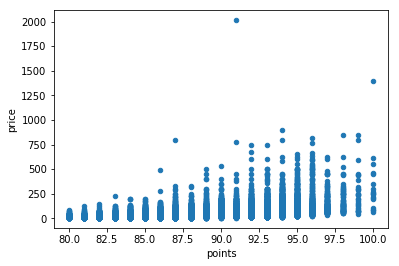

In [14]:
#Relation between points and price
scatter1=data.plot.scatter(x='points',y='price')

In [15]:
data.describe()

,points,price
count,89580.000000,89580.000000
mean,88.617984,39.095903
std,3.179483,36.153156
min,80.000000,4.000000
25%,86.000000,19.000000
50%,88.000000,30.000000
75%,91.000000,48.000000
max,100.000000,2013.000000


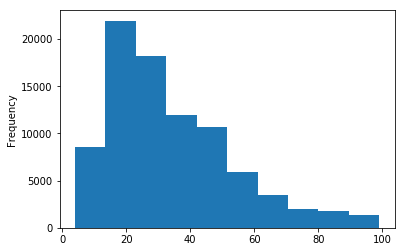

In [16]:
indexNames = data[ data['price'] >= 100].index
dfObj=data.drop(indexNames , inplace=False)

dfObj['price'].plot.hist()

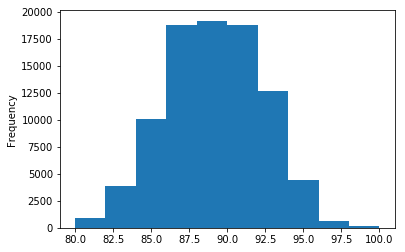

In [17]:
data['points'].plot.hist(bins=10)

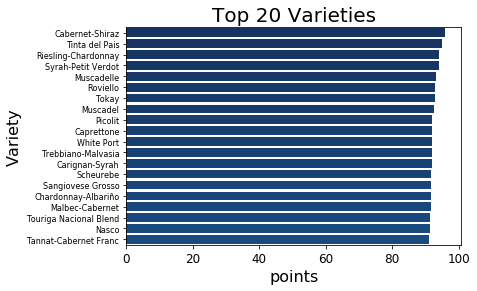

In [18]:
#Wine Variety with Highest Ratings
data11=data.groupby('variety', as_index=False)['points'].mean()
dat12=data11.sort_values(by=['points'], ascending=False)
top20=dat12.head(20)

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=top20['points'],y=top20['variety'], palette=sns.color_palette("Blues_r",200))
plt.yticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.xticks(fontsize=12)
plt.xlabel('points',fontsize=16)
plt.ylabel('Variety',fontsize=16)
plt.title("Top 20 Varieties", fontsize=20)
plt.show()
#top10.plot(kind='bar')

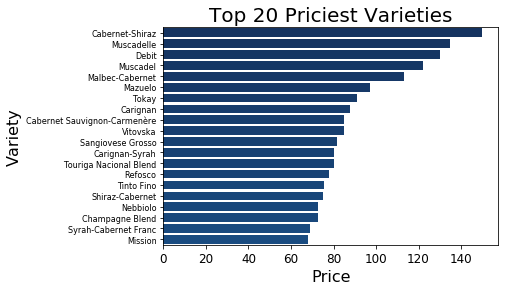

In [19]:
#Wine Variety with Highest Ratings
data11=data.groupby('variety', as_index=False)['price'].mean()
dat12=data11.sort_values(by=['price'], ascending=False)
top20=dat12.head(20)

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=top20['price'],y=top20['variety'], palette=sns.color_palette("Blues_r",200))
plt.yticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.xticks(fontsize=12)
plt.xlabel('Price',fontsize=16)
plt.ylabel('Variety',fontsize=16)
plt.title("Top 20 Priciest Varieties", fontsize=20)
plt.show()
#top10.plot(kind='bar')


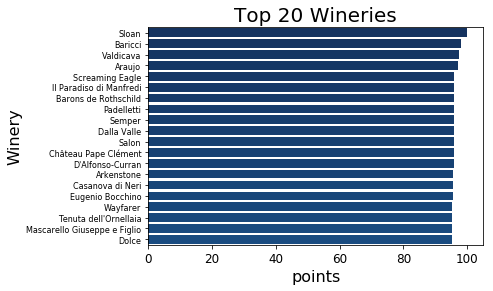

In [20]:
#Wine Variety with Highest Ratings
data11=data.groupby('winery', as_index=False)['points'].mean()
dat12=data11.sort_values(by=['points'], ascending=False)
top20=dat12.head(20)

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=top20['points'],y=top20['winery'], palette=sns.color_palette("Blues_r",200))
plt.yticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.xticks(fontsize=12)
plt.xlabel('points',fontsize=16)
plt.ylabel('Winery',fontsize=16)
plt.title("Top 20 Wineries", fontsize=20)
plt.show()
#top10.plot(kind='bar')

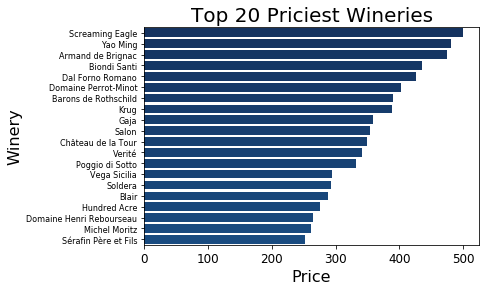

In [21]:
#Wine Variety with Highest Ratings
data11=data.groupby('winery', as_index=False)['price'].mean()
dat12=data11.sort_values(by=['price'], ascending=False)
top20=dat12.head(20)

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=top20['price'],y=top20['winery'], palette=sns.color_palette("Blues_r",200))
plt.yticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.xticks(fontsize=12)
plt.xlabel('Price',fontsize=16)
plt.ylabel('Winery',fontsize=16)
plt.title("Top 20 Priciest Wineries", fontsize=20)
plt.show()
#top10.plot(kind='bar')

Text(0.5, 0, 'Category')

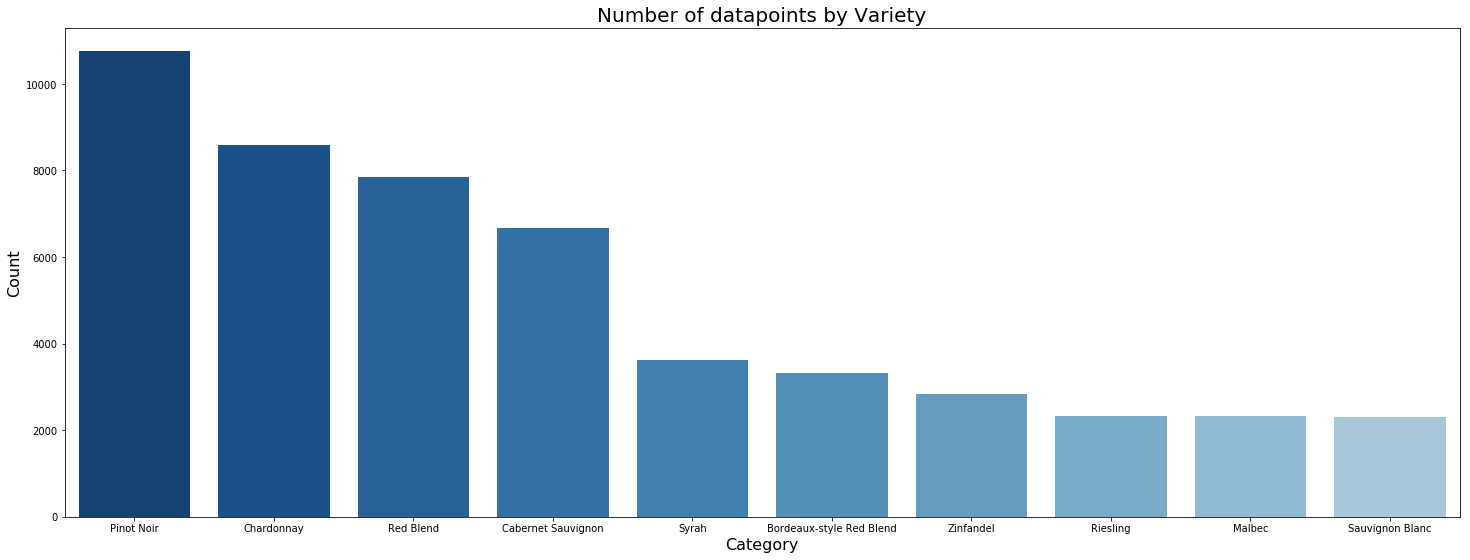

In [22]:
plt.figure(figsize = (25,9))
sns.countplot(data['variety'],order = data['variety'].value_counts()[:10].index, palette=sns.color_palette("Blues_r",15))
plt.title('Number of datapoints by Variety',fontsize=20)

plt.ylabel('Count',fontsize=16)
plt.xlabel('Category',fontsize=16)

Text(0.5, 0, 'Winery')

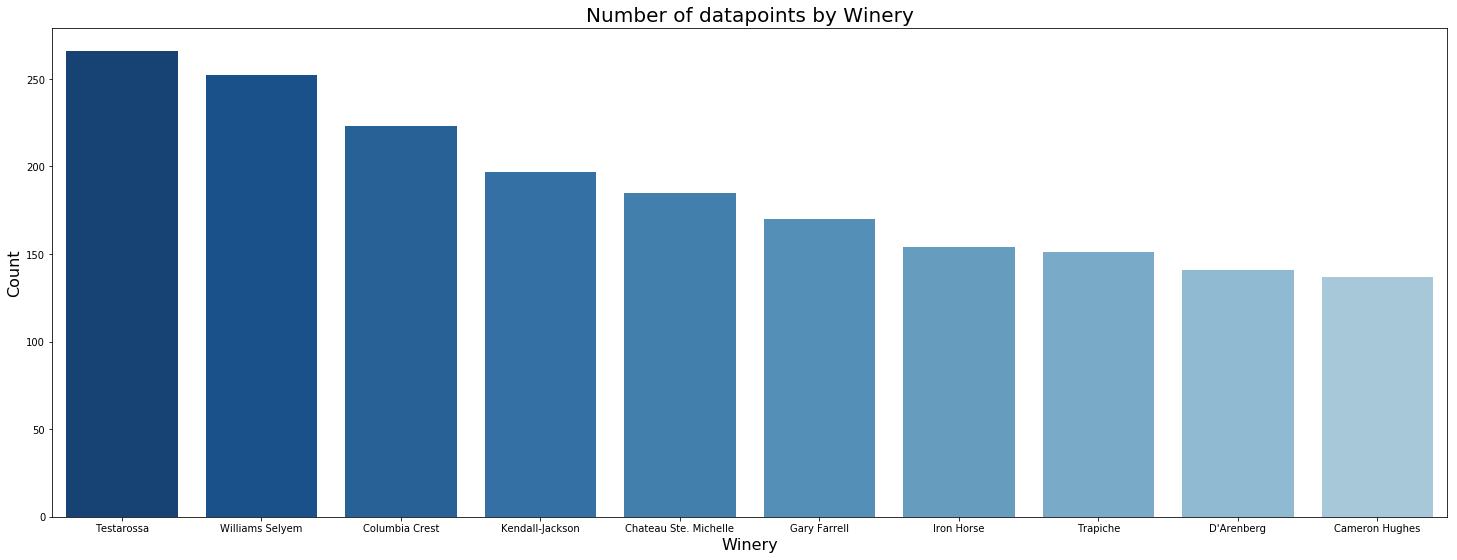

In [23]:
plt.figure(figsize = (25,9))
sns.countplot(data['winery'],order = data['winery'].value_counts()[:10].index, palette=sns.color_palette("Blues_r",15))
plt.title('Number of datapoints by Winery',fontsize=20)

plt.ylabel('Count',fontsize=16)
plt.xlabel('Winery',fontsize=16)

In [24]:
from sklearn.model_selection import train_test_split
train1, test1 = train_test_split(data, test_size=0.3)


In [25]:
#preparing the training data
#train=data.iloc[:65000]
#test=data.iloc[65000:]

train1.to_csv("train1.csv", index=False)
train=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/train1.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62706 entries, 0 to 62705
Data columns (total 11 columns):
country        62706 non-null object
description    62706 non-null object
designation    62706 non-null object
points         62706 non-null int64
price          62706 non-null float64
province       62706 non-null object
region_1       62706 non-null object
variety        62706 non-null object
winery         62706 non-null object
Color          62706 non-null object
Class          62706 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 5.3+ MB


In [26]:
#preparing the testing data
test1.to_csv("test1.csv", index=False)
test=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/test1.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26874 entries, 0 to 26873
Data columns (total 11 columns):
country        26874 non-null object
description    26874 non-null object
designation    26874 non-null object
points         26874 non-null int64
price          26874 non-null float64
province       26874 non-null object
region_1       26874 non-null object
variety        26874 non-null object
winery         26874 non-null object
Color          26874 non-null object
Class          26874 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 2.3+ MB


Preparing data for classifier and regressor

In [28]:
clean_overview1 =[]
for i in range (0,62706):
    clean_overview1.append(convertToWords(str(train["description"][i])))

print (clean_overview1[100])

floral scents honeysuckle citrus blossom mingle white stone fruit aromas lively weightless palate doles white peach green apple framed bright acidity polished perlage clean refreshing finish


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
print("Start")
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
print("mid")
train_data_features1 = vectorizer.fit_transform(clean_overview1)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features1 = train_data_features1.toarray()
print("done")

Start
mid
done


In [30]:
train_data_features1.shape

(62706, 5000)

In [31]:
vocab1 = vectorizer.get_feature_names()
print (vocab1)


['ability', 'able', 'abound', 'abounds', 'abrasive', 'abrupt', 'abruptly', 'abruzzo', 'absence', 'absolute', 'absolutely', 'absorb', 'abundance', 'abundant', 'abv', 'acacia', 'accent', 'accented', 'accenting', 'accents', 'accentuate', 'accentuated', 'accentuates', 'acceptable', 'accessible', 'accompanied', 'accompanies', 'accompaniment', 'accompany', 'accompanying', 'according', 'accounts', 'achieve', 'achieved', 'achievement', 'achieves', 'acid', 'acidic', 'acidity', 'acids', 'acquired', 'acre', 'acres', 'acrid', 'across', 'act', 'action', 'actually', 'adam', 'add', 'added', 'adding', 'addition', 'additional', 'additions', 'adds', 'adequate', 'admirable', 'admirably', 'adorned', 'advance', 'advantage', 'aeration', 'affordable', 'afternoon', 'aftertaste', 'afterward', 'age', 'ageability', 'ageable', 'aged', 'ager', 'ages', 'ageworthiness', 'ageworthy', 'aggressive', 'aggressively', 'agile', 'aging', 'aglianico', 'ago', 'agreeable', 'ahead', 'ahi', 'aid', 'aims', 'air', 'airing', 'airs'

In [32]:
# Sum up the counts of each vocabulary word
dist1 = np.sum(train_data_features1, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab1, dist1):
    print (count, tag)

71 ability
43 able
106 abound
19 abounds
67 abrasive
46 abrupt
19 abruptly
25 abruzzo
20 absence
34 absolute
159 absolutely
18 absorb
76 abundance
154 abundant
42 abv
182 acacia
451 accent
830 accented
62 accenting
882 accents
30 accentuate
22 accentuated
55 accentuates
44 acceptable
329 accessible
139 accompanied
33 accompanies
41 accompaniment
85 accompany
25 accompanying
19 according
19 accounts
67 achieve
29 achieved
22 achievement
44 achieves
749 acid
810 acidic
14481 acidity
1340 acids
19 acquired
152 acre
47 acres
17 acrid
588 across
52 act
23 action
110 actually
34 adam
760 add
234 added
353 adding
175 addition
303 additional
44 additions
840 adds
83 adequate
40 admirable
17 admirably
32 adorned
17 advance
19 advantage
43 aeration
115 affordable
30 afternoon
926 aftertaste
16 afterward
2794 age
165 ageability
87 ageable
1434 aged
218 ager
88 ages
21 ageworthiness
143 ageworthy
236 aggressive
24 aggressively
25 agile
1998 aging
112 aglianico
76 ago
17 agreeable
119 ahead
21 ahi


32 cidery
70 ciel
251 cigar
20 cilantro
31 ciliegiolo
1963 cinnamon
181 cinsault
248 citric
16 citron
4957 citrus
606 citrusy
31 city
26 clacky
29 clairette
19 clamp
57 clampy
27 clare
18 clarendon
31 claret
88 clarity
176 class
955 classic
22 classical
113 classically
141 classico
172 classy
144 clay
2689 clean
24 cleanly
147 cleansing
196 clear
144 clearly
21 clench
30 clifton
467 climate
31 clings
51 clipped
17 cloak
51 clonal
212 clone
143 clones
66 clos
988 close
257 closed
20 closer
352 closes
17 closing
21 cloud
43 cloudy
1933 clove
40 clover
57 cloves
184 cloying
93 clumsy
24 clunky
96 cluster
21 clusters
159 co
59 coarse
233 coast
236 coastal
115 coat
43 coated
266 coating
61 coats
23 coax
17 coaxing
43 cobbler
86 cocktail
971 cocoa
660 coconut
17 cofermented
2503 coffee
17 cohesive
30 coiled
2768 cola
190 cold
25 collection
19 collines
34 colombard
2248 color
432 colored
24 colorful
40 colorino
19 colors
65 columbia
267 combination
384 combine
74 combined
329 combines
110 com

186 instead
139 integrate
910 integrated
24 integrates
33 integrating
60 integration
84 integrity
22 intellectual
23 intended
1925 intense
418 intensely
21 intensify
1202 intensity
316 interest
866 interesting
33 interestingly
32 intermingle
74 international
32 interplay
84 interpretation
18 intertwined
28 interwoven
28 intoxicating
118 intricate
24 intricately
101 intrigue
19 intrigues
457 intriguing
30 intriguingly
73 introduce
37 introduces
36 introduction
22 intrusive
69 invigorating
17 invisible
18 invite
33 invites
456 inviting
25 inzolia
86 iodine
128 iris
275 iron
73 irresistible
23 irresistibly
18 ish
62 island
28 issue
32 issues
259 italian
398 italy
39 jacket
66 jagged
57 jalape
1450 jam
18 james
21 jamminess
1611 jammy
287 jasmine
40 jean
24 jellied
96 jelly
17 jensen
122 jerky
18 jicama
27 jim
145 job
42 john
38 join
65 joined
18 joins
21 jolly
20 jolt
35 joseph
21 josh
17 journey
59 joy
47 judge
20 judged
42 judicious
664 juice
27 juices
119 juiciness
3625 juicy
36 jumble

37 rz
161 rztraminer
65 saddle
39 saffron
836 sage
146 sagebrush
34 sagrantino
88 said
25 saign
108 saint
16 sainte
138 salad
38 salads
22 salami
25 salinas
157 saline
18 salinic
34 salinity
255 salmon
251 salt
27 salta
74 salted
37 saltiness
441 salty
22 sample
114 san
69 sancerre
20 sand
661 sandalwood
18 sandpaper
29 sandpapery
22 sandy
1203 sangiovese
91 sanguine
308 santa
23 santo
33 sap
147 sappy
24 sardinia
17 sardinian
31 sarsaparilla
81 sassafras
37 sassy
34 satin
35 satiny
33 satisfies
79 satisfy
391 satisfying
23 satisfyingly
313 saturated
493 sauce
20 sauced
21 sauces
144 saucy
54 sausage
28 sausages
69 saut
38 sauv
19 sauvage
4138 sauvignon
21 save
24 saved
40 savor
27 savoriness
2347 savory
34 saw
86 sawdust
156 say
103 says
28 sb
20 sbragia
34 scale
17 scallion
30 scallops
32 scattered
33 scene
193 scent
225 scented
1720 scents
23 schist
29 schisty
52 school
23 scope
195 scorched
148 score
36 scores
19 scott
86 scour
77 scouring
73 scoury
19 scrambled
182 scratchy
17 scr

44 textures
95 th
73 thai
371 thanks
56 theme
19 therefore
1443 thick
29 thicker
68 thickly
83 thickness
512 thin
141 thing
362 things
178 think
24 thins
200 third
121 thirds
37 thirst
16 thomas
18 thorny
23 thorough
147 thoroughly
983 though
23 thought
49 thread
26 threaded
38 threads
628 three
23 thrilling
25 throat
61 throttle
491 throughout
24 throw
23 throwback
29 throwing
42 thrown
25 throws
87 thus
538 thyme
30 tickling
19 tie
52 tier
44 tiers
2606 tight
22 tightens
37 tighter
676 tightly
49 tightness
233 tilled
2341 time
79 times
77 tinge
214 tinged
75 tingling
20 tingly
30 tint
28 tinta
230 tiny
35 tip
70 tire
65 tired
17 tiring
3101 toast
1528 toasted
128 toastiness
1783 toasty
2860 tobacco
21 tocai
63 today
199 toffee
1182 together
657 tomato
36 tomatoes
60 tomatoey
84 ton
204 tone
407 toned
1249 tones
279 tongue
176 tonic
117 tons
27 took
22 tooth
852 top
91 topped
19 topping
84 toro
67 torront
45 total
269 totally
3712 touch
168 touched
666 touches
551 tough
36 toughness
2

The classifier system for point classification

In [33]:
#first split the data into train and val
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(train_data_features1, train["Class"], test_size=0.4, random_state=42)

In [34]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(37623, 5000)
(25083, 5000)
(37623,)
(25083,)


In [35]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 50 trees
forest = RandomForestClassifier(n_estimators = 50,verbose=1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_X, train_Y )

Training the random forest...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


In [36]:
print(forest.score)

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)>


Classifier System for Color Classification

In [37]:
#first split the data into train and val
from sklearn.model_selection import train_test_split

train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_data_features1, train["Color"], test_size=0.4, random_state=42)
print(train_X1.shape)
print(test_X1.shape)
print(train_Y1.shape)
print(test_Y1.shape)

(37623, 5000)
(25083, 5000)
(37623,)
(25083,)


In [38]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 50 trees
forest1 = RandomForestClassifier(n_estimators = 50,verbose=1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest1 = forest1.fit( train_X1, train_Y1 )

Training the random forest...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [39]:
print(forest1.score)

<bound method ClassifierMixin.score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)>


In [40]:
clean_overview_test =[]
for i in range (0,26874):
 clean_overview_test.append(convertToWords(str(test["description"][i])))

print (clean_overview_test[100])

top wine ch teau du c dre beautifully balanced chewy tannins given right perspective impressively dark fruits wine brooding profound concentrated complex age least years


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
test_data_features2 = vectorizer.fit_transform(clean_overview_test)

# Numpy arrays are easy to work with, so convert the result to an 
# array
test_data_features2 = test_data_features2.toarray()

Predicting Points Classification

In [42]:
result = forest.predict(test_data_features2)
output = pd.DataFrame(data={"Description":test["description"], "Name":test["designation"], "Class":result})
output.to_csv("ResultOutput.csv", index=False)
print("done predicting")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished


done predicting


Accuarcy of the Point Classifier

In [43]:
from sklearn.metrics import classification_report
predicted =forest.predict (test_X)
report = classification_report(test_Y, predicted)
print ("Accuracy of the Classifier for Points")
print(report)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy of the Classifier for Points
              precision    recall  f1-score   support

   excellent       0.00      0.00      0.00       232
        good       0.77      0.37      0.50      7129
      normal       0.64      0.93      0.75     13590
        poor       0.80      0.35      0.48      4132

   micro avg       0.67      0.67      0.67     25083
   macro avg       0.55      0.41      0.43     25083
weighted avg       0.69      0.67      0.63     25083



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicting Color of Wine

In [44]:
result = forest1.predict(test_data_features2)
output = pd.DataFrame(data={"Description":test["description"], "Name":test["designation"], "Color":result})
output.to_csv("ResultOutput.csv", index=False)
print("done predicting")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.1s finished


done predicting


Accuracy of the Color Classifier

In [45]:
from sklearn.metrics import classification_report
predicted =forest1.predict (test_X1)
report = classification_report(test_Y1, predicted)
print ("Accuracy of the Classifier for Color")
print(report)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


Accuracy of the Classifier for Color
              precision    recall  f1-score   support

         red       0.96      0.98      0.97     16200
        rose       0.74      0.17      0.28       617
       white       0.95      0.96      0.95      8266

   micro avg       0.96      0.96      0.96     25083
   macro avg       0.88      0.70      0.73     25083
weighted avg       0.95      0.96      0.95     25083



#Regression for the points

In [ ]:
#first split the data into train and val
from sklearn.model_selection import train_test_split

train_C, test_C, train_D, test_D = train_test_split(train_data_features1, train["points"], test_size=0.4, random_state=42)

In [46]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

train_C, train_D = make_regression(n_features=5000, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train_C, train_D)


Training the random forest...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
print(regr.feature_importances_)


[0. 0. 0. ... 0. 0. 0.]


In [49]:
result = regr.predict(test_data_features2)
output = pd.DataFrame(data={"Description":test["description"], "Name":test["designation"], "Points":result})
output.to_csv("ResultOutput.csv", index=False)
print("done predicting")

done predicting


In [51]:
accuracy=regr.score(test_C, test_D)
print(accuracy)

-414.3206557893699


Linear Regression Model or predicting wine scores from decription

Preparing the training data

In [40]:
clean_overview_test1 =[]
for i in range (0,26880):
 clean_overview_test1.append(convertToWords(str(test["description"][i])))

print (clean_overview_test1[100])

hugely concentrated powerful ageworthy mint new wood aromas rich damson blackberry fruits push mineral texture dark tannins filling mouth exuberant ripeness age four years


In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
test_data_features3 = vectorizer.fit_transform(clean_overview_test1)

# Numpy arrays are easy to work with, so convert the result to an 
# array
test_data_features3 = test_data_features3.toarray()

Fitting the model with training data

In [42]:

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(test_data_features3, test["points"])

Preparing the testing data

In [52]:
test1=train.iloc[:15000]
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
country        15000 non-null object
description    15000 non-null object
designation    15000 non-null object
points         15000 non-null int64
price          15000 non-null float64
province       15000 non-null object
region_1       15000 non-null object
variety        15000 non-null object
winery         15000 non-null object
Class          15000 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.1+ MB


In [53]:
clean_overview_test1 =[]
for i in range (0,15000):
 clean_overview_test1.append(convertToWords(str(test1["description"][i])))

print (clean_overview_test1[100])

five grand cru vineyards c te des blancs chardonnay great wine toast almond flavors showing good bottle age along freshness finesse ripe white fruits structured lingering aftertaste imported robert chadderdon selections


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
test_data_features4= vectorizer.fit_transform(clean_overview_test1)

# Numpy arrays are easy to work with, so convert the result to an 
# array
test_data_features4 = test_data_features4.toarray()

In [120]:
predictions = lm.predict(test_data_features4)
print(predictions[0:50])
redictions1=predictions.astype(int)
print(predictions1[0:50])

[89.6017389  86.51977827 89.18526204 83.79523882 83.62717382 85.59837263
 87.69967018 89.35749904 93.45557412 84.73091016 91.47431696 87.69672488
 89.35290953 91.40953977 91.9534523  87.66034145 86.34965737 90.5616848
 85.01415931 86.11258414 82.56763153 90.67385666 86.81332924 89.2748789
 86.96266886 84.2867853  89.52511468 84.90486298 89.17185066 84.26987341
 90.50534238 91.2673589  88.13858076 85.77595884 91.4956221  86.08173992
 90.69219658 87.22836993 90.05425175 95.57621106 89.15509262 91.913138
 92.96496873 90.5807788  89.8397158  85.88550394 88.94221866 91.54478834
 89.47298324 92.82126266]


In [114]:
df=pd.DataFrame({'Actual':test1["points"], 'Predicted':(predictions1)})

df.describe()

,Actual,Predicted
count,15000.000000,1.500000e+04
mean,88.646667,-6.886256e+07
std,3.182174,3.783502e+08
min,80.000000,-2.147484e+09
25%,86.000000,8.600000e+01
50%,89.000000,8.800000e+01
75%,91.000000,9.000000e+01
max,100.000000,1.060000e+02


#Removing obvious outliers from predicted points

In [116]:
indexNames = df[ df['Predicted'] > 100].index
dfObj1=df.drop(indexNames , inplace=False)

indexNames = dfObj1[ dfObj1['Predicted'] < 0].index
dfObj=df.drop(indexNames , inplace=False)

dfObj.describe()

,Actual,Predicted
count,14519.000000,14519.000000
mean,88.602590,88.528067
std,3.187757,2.992832
min,80.000000,77.000000
25%,86.000000,86.000000
50%,88.000000,88.000000
75%,91.000000,90.000000
max,100.000000,106.000000


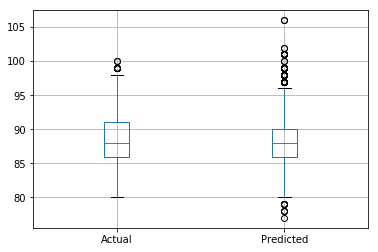

In [118]:
#Comaprison of actual and predicted points after runing regression
boxplot=dfObj.boxplot()

In [119]:
#Error for our linear regression model
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 
print ('Mean Squared Error:' ,metrics.mean_squared_error(dfObj["Actual"], dfObj["Predicted"]))
print ('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(dfObj["Actual"], dfObj["Predicted"])))
print ('Mean Absolute Error:' ,metrics.mean_absolute_error(dfObj["Actual"], dfObj["Predicted"]))

Mean Squared Error: 13.919966939871893
Root Mean Squared Error: 3.730947190710677
Mean Absolute Error: 2.9637027343480957


Classifier System for the Wine Variety: 
For doing this we have taken the top 5 wine variety that has the most countc in the dataset

In [ ]:
 varietals = ['Pinot Noir','Chardonnay','Red Blend','Cabernet Sauvignon','Syrah']
 data.variety.isin(varietals) 
 data2= data[data.variety.isin(varietals)]
 data2.to_csv("data2.csv", index=False)
 data=pd.read_csv('C:/Users/tpmpi/Documents/MBA/Semester 5/MIS 584/data2.csv')
 data.shape

In [ ]:
train1.to_csv("train1.csv", index=False)
train=pd.read_csv('C:/Users/Lynnette Hutson/Downloads/train1.csv')
train.info()

In [ ]:
#preparing the testing data
test1.to_csv("test1.csv", index=False)
test=pd.read_csv('C:/Users/Lynnette Hutson/Downloads/test1.csv')
test.info()

In [ ]:
clean_overview =[]
for i in range (0,37494):
 clean_overview.append(convertToWords(str(data["description"][i])))

print (clean_overview[100])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
print("Start")
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
print("mid")
train_data_features4 = vectorizer.fit_transform(clean_overview)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features4 = train_data_features4.toarray()
print("done")
train_data_features4.shape

In [ ]:
vocab3 = vectorizer.get_feature_names()
print (vocab3)

In [ ]:
# Sum up the counts of each vocabulary word
dist3 = np.sum(train_data_features4, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab3, dist3):
    print (count, tag)

In [ ]:
#first split the data into train and val
from sklearn.model_selection import train_test_split

train_X2, test_X2, train_Y2, test_Y2 = train_test_split(train_data_features4, train["variety"], test_size=0.4, random_state=42)

In [ ]:
print(train_X2.shape)
print(test_X2.shape)
print(train_Y2.shape)
print(test_Y2.shape)

In [ ]:
print ("Training the random forest...")
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 50 trees
forest3 = RandomForestClassifier(n_estimators = 50,verbose=1) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest3 = forest3.fit( train_X, train_Y )
print(forest.score)

In [ ]:
clean_overview_test =[]
for i in range (0,11249):
 clean_overview_test.append(convertToWords(str(test["description"][i])))

print (clean_overview_test[100])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
test_data_features2 = vectorizer.fit_transform(clean_overview_test)

# Numpy arrays are easy to work with, so convert the result to an 
# array
test_data_features2 = test_data_features2.toarray()

In [ ]:
result = forest.predict(test_data_features2)
output = pd.DataFrame(data={"Description":test["description"], "Name":test["designation"], "Variety":result})
output.to_csv("ResultOutput.csv", index=False)
print("done predicting")

In [ ]:
from sklearn.metrics import classification_report
predicted =forest.predict (test_X)
report = classification_report(test_Y, predicted)
print ("Accuracy of the Classifier")
print(report)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

data1=pd.read_csv('C:/MIS584/GroupProject/wine-reviews/winemag-data_first150k_wvarietals.csv')

data2=pd.read_csv('C:/MIS584/GroupProject/wine-reviews/winemag-data-130k-v2_wvarietals.csv')

In [ ]:
data3= data2.drop('taster_name', axis=1)
data4= data3.drop('taster_twitter_handle',axis=1)
data5= data4.drop('title',axis=1)
data=pd.concat([data1,data5])
data=data.drop('Unnamed: 0',axis=1)
data.info()

In [ ]:
#Since region_2 had a lot of null values as seen from above statistics, removed that fromthe dataset
data=data.drop('region_2',axis=1)
data.info()

In [ ]:
#adding a point classification column
Class = []
for col in data['points']:
    if col<=85:
        Class.append("poor")
    elif col >85 and col<=90:
        Class.append("normal")
    elif col >90 and col<=95:
        Class.append("good")
    else:
        Class.append("excellent") 

In [ ]:
data['Class']=Class
#Removing all Null values from all columns
data10= data.dropna()
#Removing the duplicates from description column
#First sorting the descriptions
data10.sort_values("description", inplace=True)
#Drop duplicates according to descriptions
data10.drop_duplicates(subset="description",keep='first', inplace=True)

In [ ]:
data10.to_csv("data10.csv", index=False)
data=pd.read_csv('C:/Users/Lynnette Hutson/Downloads/data10.csv')
data.info()

In [ ]:
data['variety'].value_counts()

In [ ]:
 varietals = ['Syrah']
 data.variety.isin(varietals) 
 data2= data[data.variety.isin(varietals)]
 data2.to_csv("data2.csv", index=False)
 data=pd.read_csv('C:/Users/Lynnette Hutson/Downloads/data2.csv')
 data.shape

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [ ]:

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 